<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/ora2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. óra

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [1]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

In [3]:
dataframe = pd.read_csv(file_url)

In [4]:
dataframe.shape

(303, 14)

In [5]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [8]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
labeler = LabelEncoder()

In [12]:
labeler.fit(dataframe.thal)

LabelEncoder()

In [14]:
dataframe.thal = labeler.transform(dataframe.thal)

In [15]:
#egy lépésben:
#dataframe.thal = labeler.fit_transform(...)

In [16]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [17]:
y_df = dataframe.target

In [19]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [20]:
x_df = dataframe.copy().drop('target', axis = 1)

In [21]:
x_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

In [25]:
x_train.shape

(272, 13)

In [27]:
x_test.shape[0] == y_test.shape[0]

True

##Adatnormalizálás

tilos egyben normalizálni, csak külön szabad a traint és a tesztet --> van származtatott információ!
mivel nagyon hatékony a tanulóalgoritmus

In [29]:
normalizer = StandardScaler()

In [30]:
normalizer.fit(x_train)

StandardScaler()

In [31]:
x_train = normalizer.transform(x_train)

In [32]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.048102,-1.422049,-0.103272,0.192042,1.181209,2.481511,-1.002010,0.875774,-0.691564,-0.871309,-0.940828,-0.735723,-0.460808
1,1.293826,0.703211,0.865350,-1.097030,-0.665740,-0.402980,1.024360,-0.772441,1.445998,-0.785627,-0.940828,0.328727,-0.460808
2,1.517481,0.703211,-3.009138,0.696461,-1.047175,2.481511,0.011175,-0.382075,-0.691564,2.041875,-0.940828,1.393178,-0.460808
3,-0.159930,-1.422049,0.865350,-0.088191,0.378188,-0.402980,1.024360,-0.295326,-0.691564,-0.528582,0.689142,-0.735723,-0.460808
4,1.405654,-1.422049,0.865350,-1.433309,-0.444909,-0.402980,-1.002010,-0.338701,-0.691564,-0.614264,-0.940828,1.393178,-0.460808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.405654,0.703211,0.865350,-0.368424,0.177432,2.481511,-1.002010,0.572155,-0.691564,-0.699945,0.689142,1.393178,1.125771
268,0.287380,0.703211,-1.071894,1.256927,-0.264229,-0.402980,1.024360,0.615529,-0.691564,-0.871309,-0.940828,0.328727,-0.460808
269,-0.495412,-1.422049,-1.071894,-0.648657,-0.023323,-0.402980,-1.002010,0.528781,-0.691564,0.071192,-0.940828,-0.735723,-0.460808
270,0.958344,-1.422049,-1.071894,0.472275,-1.007024,-0.402980,-1.002010,1.266140,-0.691564,-0.871309,-0.940828,1.393178,-0.460808


In [33]:
#trainen betanult normlizálót alkalmazzuk a teszt adatbázison
#többletinformációt szolgáltatna a szórással és az átlaggal
x_test = normalizer.transform(x_test)

##Architektúra létrehozása

In [44]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [38]:
input = Input(shape=(x_train.shape[1]))
#dense (hány neuront szeretnénk? 2^n, aktiváció) (bemenet a rejtett rétegnek)
x= Dense(32, activation='relu')(input)
#bináris osztályozás, egy neuron a vége, ahol vszségként lesz értelmezve
output = Dense(1, activation = 'sigmoid')(x)

In [39]:
model = keras.Model(input, output)

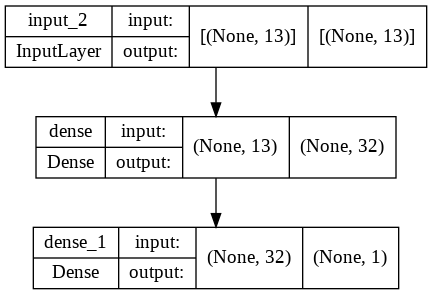

In [42]:
plot_model(model, show_shapes=True)

In [45]:
model.compile(loss='binary_crossentropy', metrics=['BinaryAccuracy'])

In [48]:
model.fit(x=x_train, y=y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 1s 4ms/step - loss: 0.8199 - binary_accuracy: 0.3566
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7255 - binary_accuracy: 0.4596
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6643 - binary_accuracy: 0.5551
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6148 - binary_accuracy: 0.7059
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5718 - binary_accuracy: 0.7757
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5341 - binary_accuracy: 0.8235
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5007 - binary_accuracy: 0.8456
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4728 - binary_accuracy: 0.8456
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4494 - binary_accuracy: 0.8456
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.

In [49]:
model.predict(x_test)

array([[3.8215941e-01],
       [6.6495746e-02],
       [3.0006617e-02],
       [2.7200282e-03],
       [7.0644575e-01],
       [7.5760484e-04],
       [2.1373001e-01],
       [7.2145444e-01],
       [2.3966134e-03],
       [2.8955546e-01],
       [4.8653808e-01],
       [5.2113879e-01],
       [8.8233709e-01],
       [5.9830546e-02],
       [7.8003490e-01],
       [1.2021598e-01],
       [6.3044083e-01],
       [3.0396974e-01],
       [7.7351034e-03],
       [1.9053060e-01],
       [2.0149654e-01],
       [5.5193388e-01],
       [9.7156072e-01],
       [2.8977692e-03],
       [5.2912831e-03],
       [7.3968852e-01],
       [8.0147099e-01],
       [8.1467342e-01],
       [5.5514121e-01],
       [9.1701746e-03],
       [5.4544210e-04]], dtype=float32)

In [50]:
model.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 284ms/step - loss: 0.3325 - binary_accuracy: 0.9032


[0.33247071504592896, 0.9032257795333862]